In [1]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
K=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]

In [2]:
from scipy.stats import multivariate_normal as mvn
from sklearn.covariance import ledoit_wolf
import decimal
Te = 0.75

X = []
Y = []
for _ in range(100):
    sims=HW.create_path(0.25,0.75,0)[1][2::]
    X.append(sims[0])
    Y.append(sims[1])

HW.C(0, 0.5, Te)-np.cov(X,Y)

# print(mvn.pdf([0.0,0.0], mean=[HW.expectedRate(Te),HW.expectedRate(0.5)], cov=HW.C(0,Te,0.5)))

array([[-8.13543871e-06, -9.15040121e-06],
       [-9.15040121e-06, -1.90143629e-05]])

In [3]:
np.linalg.eigvals(HW.C(0,Te,0.5))>0, np.linalg.eigvals(HW.C(0,0.5,Te))>0

(array([ True,  True]), array([ True,  True]))

In [4]:
Te=0.51
mvn.pdf([0.0,0.0], mean=[HW.expectedRate(Te),HW.expectedRate(0.5)], cov=HW.C(0,Te,0.5))

263.3250402472318

In [5]:
from joblib import load
import seaborn as sns
EPE = load('./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib')
ENE = load('./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib')
anSwap = [HW.swaption(0,Te,S,T,K) for Te in np.arange(0,1+0.1,0.1)]


<Axes: >

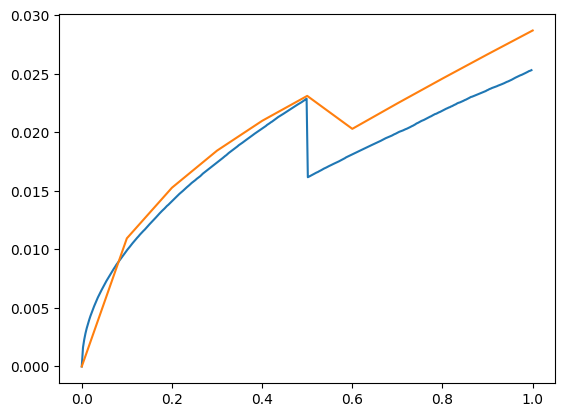

In [7]:
sns.lineplot(x=np.arange(0,10+1/25,1/365)[0:(365)],y=np.array(EPE[0:(365)]))
sns.lineplot(x=np.arange(0,1+0.1,0.1),y=anSwap)